> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I'm going to investigate [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv). This Data new dataset uploaded on kaggle contains 5000 previously released movies record with information of movie cast, budget and revanew etc.

### Question I'll try to cover in this Data Analysis Process.

1. Movies which had most and least profit in previous years.
2. Average Profit Movies made each year.
3. Movies with largest and lowest budget in previous years.
4. What was the Average Votes (Rating) for all the movies.
5. List of movies with longest and shortest duration.
6. Average run time of a all movie in past years.
7. Draw List of Top 10 Popular movies.


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#importing important files 
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('movies.csv')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

### Observations from the Data Set.
1. There are some extra columns which can be removed like `homepage`, `id`, `keywords`, `overview`, `tagline`, `vote_count`, `original_title`, `spoken_languages`, `production_countries`,`production_companies`, `original_language`, `genres` etc.
2. I searched on Kaggle website about the default currency of revanew for each movie but this information is missing. So I'm assuming default currency is US Dollar for this Dataset.


### Data Cleaning

#### Remove Extra Columns.
homepage, id, keywords, overview, tagline, vote_count, orignal_title, popularity

In [4]:
extra_columns = ['homepage', 'id', 'keywords', 'overview', 'tagline', 'vote_count', 'original_title', 'spoken_languages', 'production_countries','production_companies','original_language', 'genres']
df.drop(extra_columns, axis=1, inplace=True)
df.head(2)

,budget,popularity,release_date,revenue,runtime,status,title,vote_average
0,237000000,150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2
1,300000000,139.082615,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9


#### Now We will Filter movies by status = Released then Remove Column status.

In [5]:
df= df.query("status == 'Released' ")
df.drop(['status'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4795 entries, 0 to 4802
Data columns (total 7 columns):
budget          4795 non-null int64
popularity      4795 non-null float64
release_date    4794 non-null object
revenue         4795 non-null int64
runtime         4793 non-null float64
title           4795 non-null object
vote_average    4795 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 299.7+ KB


#### Now we will perform more cleaning step.
1. Find Duplicates and delete them.
2. Replace missing values.
3. Find Incorrect DataTypes and convert them into correct DataTypes.
4. Remove those movies where budget is 0. 
5. Remove those movies where runtime is 0. 
6. Remove those movies where revenue is 0. 

In [7]:
# Find Duplicates and delete them.
sum(df.duplicated())

0

Since we don't have any duplidate values in the dataset so we don't need to remove any row from dataset.

In [8]:
# Find rows with Null or NAN values
df.isnull().sum().sum()

3

In [9]:
# Drop Nul and NaN rows.
df.dropna(inplace= True)


In [10]:
#Check DataTypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4802
Data columns (total 7 columns):
budget          4792 non-null int64
popularity      4792 non-null float64
release_date    4792 non-null object
revenue         4792 non-null int64
runtime         4792 non-null float64
title           4792 non-null object
vote_average    4792 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 299.5+ KB


As we can see datatype for `release_date` is `object` which should be `date` datatype. 

In [11]:
# Convert releaste_date column datatype from object to datetime object.
df["release_date"]= pd.to_datetime(df["release_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4802
Data columns (total 7 columns):
budget          4792 non-null int64
popularity      4792 non-null float64
release_date    4792 non-null datetime64[ns]
revenue         4792 non-null int64
runtime         4792 non-null float64
title           4792 non-null object
vote_average    4792 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 299.5+ KB


In [12]:
df.head()

,budget,popularity,release_date,revenue,runtime,title,vote_average
0,237000000,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2
1,300000000,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9
2,245000000,107.376788,2015-10-26,880674609,148.0,Spectre,6.3
3,250000000,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6
4,260000000,43.926995,2012-03-07,284139100,132.0,John Carter,6.1


In [13]:
# check for thoese movies where budget was zero.
zaro_budget = df.query("budget == 0 ")
zaro_budget.head(5)

,budget,popularity,release_date,revenue,runtime,title,vote_average
265,0,18.251129,2003-11-21,0,82.0,The Cat in the Hat,4.9
321,0,16.460356,2012-08-09,104907746,85.0,The Campaign,5.6
359,0,27.867368,2015-12-17,233755553,92.0,Alvin and the Chipmunks: The Road Chip,5.8
406,0,19.836830,2011-02-22,0,97.0,Arthur Christmas,6.7
409,0,5.159407,1979-12-20,37823676,123.0,All That Jazz,7.3


In [14]:
df = df[df.budget > 0]
df.shape

(3761, 7)

In [15]:
# Verify ravenew= 0 rows removed or not?
zaro_budget = df.query("budget == 0 ")
zaro_budget

,budget,popularity,release_date,revenue,runtime,title,vote_average


In [16]:
#Check movies with zero run time.
zero_runtime = df.query("runtime <= 0")
zero_runtime

,budget,popularity,release_date,revenue,runtime,title,vote_average
3809,4000000,1.923514,2012-07-21,0,0.0,How to Fall in Love,5.2
4241,1500000,2.028170,2005-01-13,0,0.0,The Salon,3.5


In [17]:
# Remove movies with zero run time.
df = df[df.runtime > 0]
df.shape

(3759, 7)

In [18]:
#Check movies with zero revenue.
zero_revenue = df.query("revenue <= 0")
zero_revenue

,budget,popularity,release_date,revenue,runtime,title,vote_average
83,27000000,2.418535,2015-02-13,0,109.0,The Lovers,4.8
135,150000000,21.214571,2010-02-11,0,102.0,The Wolfman,5.5
309,84000000,17.815595,2005-02-18,0,94.0,Son of the Mask,3.6
376,90000000,19.836124,1997-04-25,0,104.0,Volcano,5.2
433,84000000,44.343330,2013-07-18,0,116.0,RED 2,6.4
467,90000000,6.643778,1998-12-25,0,114.0,Mighty Joe Young,5.9
471,85000000,18.335992,2000-11-10,0,90.0,Little Nicky,5.2
492,8000000,0.719996,2015-10-30,0,89.0,Top Cat Begins,5.3
518,75000000,17.561955,1999-07-23,0,78.0,Inspector Gadget,4.3
536,75000000,13.327372,1999-12-16,0,148.0,Anna and the King,6.4


In [19]:
# Remove movies with zero revenew
df = df[df.revenue > 0]
df.shape

(3228, 7)

In [20]:
df.head()

,budget,popularity,release_date,revenue,runtime,title,vote_average
0,237000000,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2
1,300000000,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9
2,245000000,107.376788,2015-10-26,880674609,148.0,Spectre,6.3
3,250000000,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6
4,260000000,43.926995,2012-03-07,284139100,132.0,John Carter,6.1


Finally we have 3228 movie records with appropriate data and we are ready to move further.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1  (Movies which had most and least profit in previous years.)


#### Calculating the profit of the each movie


In [21]:
# Calculating profit column. From now on it will be used.
df['profit'] = df.revenue - df.budget
df.profit.head()

0    2550965087
1     661000000
2     635674609
3     834939099
4      24139100
Name: profit, dtype: int64

In [22]:
# Movie had most high profit.

df.loc[df['profit'].idxmax()]

budget                    237000000
popularity                  150.438
release_date    2009-12-10 00:00:00
revenue                  2787965087
runtime                         162
title                        Avatar
vote_average                    7.2
profit                   2550965087
Name: 0, dtype: object

`Avatar` was the most profitable movie which earns 2550965087 $ profit and it was released in 2009.

In [23]:
# Movie had lowest profit.

df.loc[df['profit'].idxmin()]

budget                    255000000
popularity                   49.047
release_date    2013-07-03 00:00:00
revenue                    89289910
runtime                         149
title               The Lone Ranger
vote_average                    5.9
profit                   -165710090
Name: 13, dtype: object

`The Lone Ranger` were the worst one which loss money after it's release. It can't even earn as they spent to made this movie.

### Research Question 2  - Average Profit Movies made each year. 


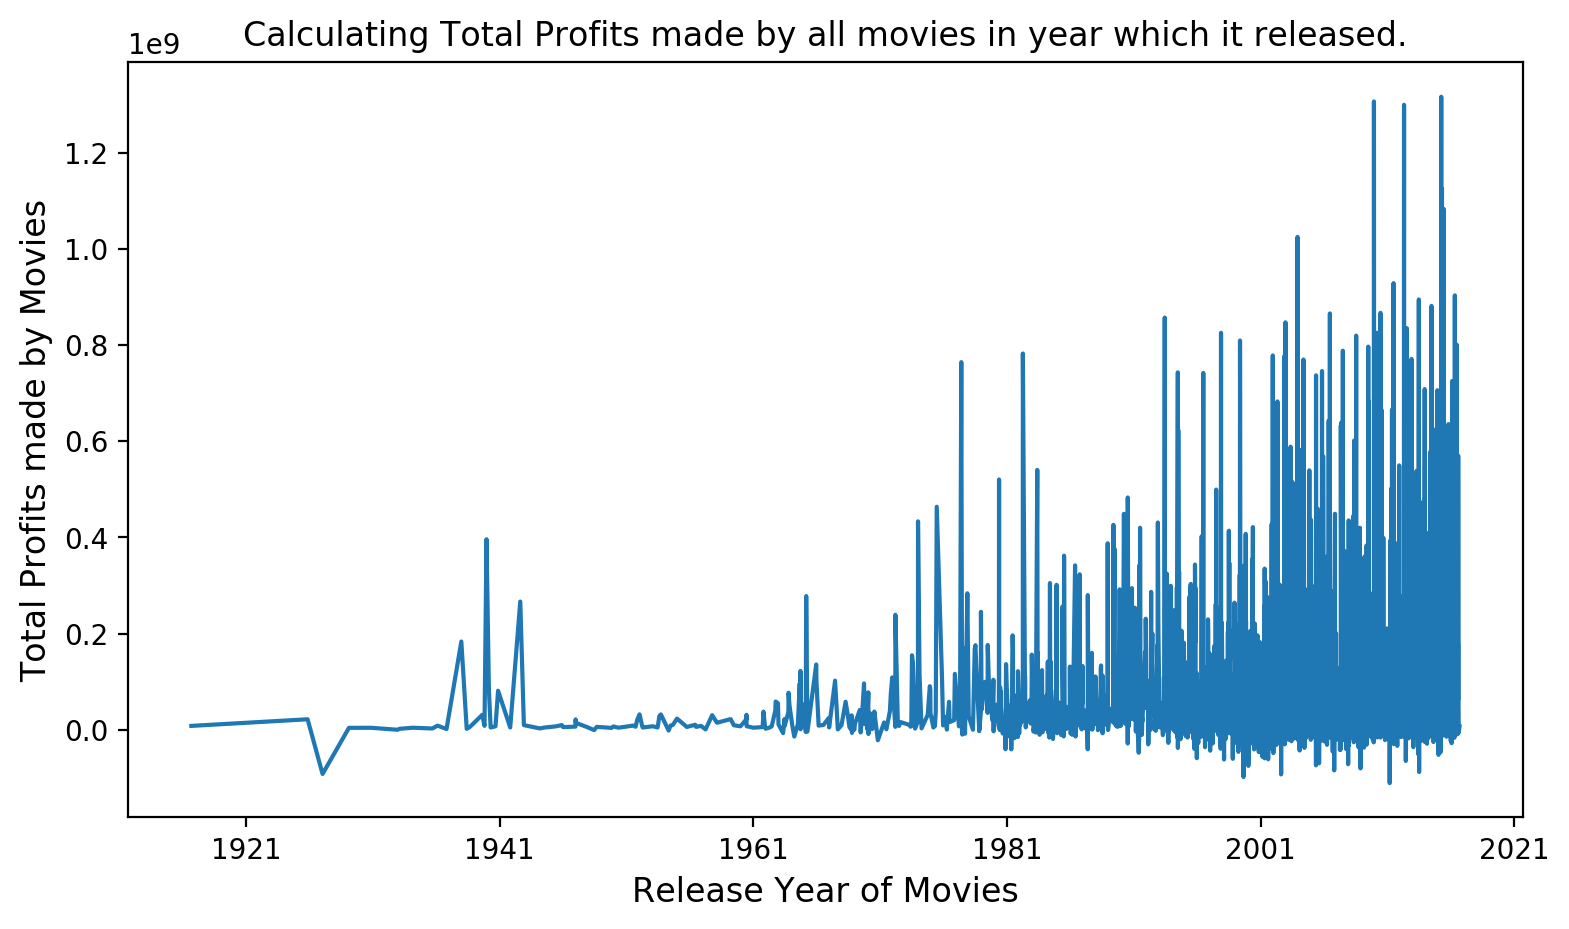

In [24]:
# We will try to draw line graph for this.
# becouse we want the profit for all the years so we will group it with release date.

profits_by_year = df.groupby('release_date')['profit'].mean()

# setting the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 200)

# labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
# labeling y-axis
plt.ylabel('Total Profits made by Movies', fontsize = 12)
# title of a the plot
plt.title('Calculating Total Profits made by all movies in year which it released.')

#plotting what needs to be plotted
plt.plot(profits_by_year)

#showing the plot
plt.show()

In [25]:
df["profit"].describe()

count    3.228000e+03
mean     8.061384e+07
std      1.581659e+08
min     -1.657101e+08
25%      2.355852e+05
50%      2.617376e+07
75%      9.749217e+07
max      2.550965e+09
Name: profit, dtype: float64

### Research Question 3  - Movies with largest and lowest budget in previous years.


In [26]:
# Movie had most high budget.
df.loc[df['budget'].idxmax()]

budget                                            380000000
popularity                                          135.414
release_date                            2011-05-14 00:00:00
revenue                                          1045713802
runtime                                                 136
title           Pirates of the Caribbean: On Stranger Tides
vote_average                                            6.4
profit                                            665713802
Name: 17, dtype: object

In [27]:
# Movie had lowest budget.

df.loc[df['budget'].idxmin()]

budget                            1
popularity                  28.2765
release_date    1936-02-05 00:00:00
revenue                     8500000
runtime                          87
title                  Modern Times
vote_average                    8.1
profit                      8499999
Name: 4238, dtype: object

### Research Question 4 - What was the Average Votes (Rating) for all the movies?

In [28]:
# Calculate Average Rating for Movies.
df['vote_average'].mean()

6.3096654275092936

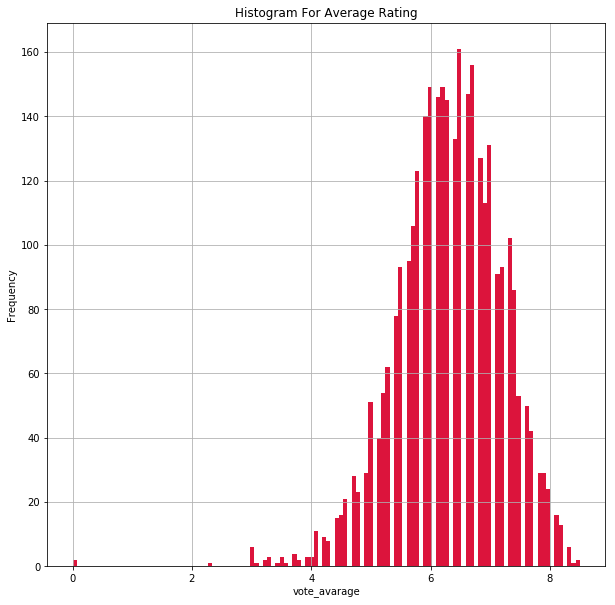

In [29]:
#Show Rating in Histogram
df.vote_average.plot(kind= "hist",
                     color='crimson',
                     bins=120,
                     grid=True,
                     figsize= (10,10)
                    )
plt.title('Histogram For Average Rating')
plt.xlabel('vote_avarage')
plt.show()

It can be seen that the average rating for movies were 6 to 7.

### Research Question 5 - list of movies with longest and shortest duration.


In [30]:
# Movie with longest duration.
df.loc[df['runtime'].idxmax()]

budget                     18000000
popularity                  1.13838
release_date    2010-05-19 00:00:00
revenue                      871279
runtime                         338
title                        Carlos
vote_average                    6.7
profit                    -17128721
Name: 2384, dtype: object

In [31]:
# Movie with shortest duration.

df.loc[df['runtime'].idxmin()]

budget                                             5000000
popularity                                         4.49837
release_date                           2010-05-14 00:00:00
revenue                                            4074023
runtime                                                 41
title           Sea Rex 3D: Journey to a Prehistoric World
vote_average                                           5.9
profit                                             -925977
Name: 3626, dtype: object

#### Average Runtime (duration on a movie)

### Research Question 6  - Average run time of a all movie in past years.


In [32]:
# Calculate Average Run Time of Movie
df.runtime.mean()

110.72490706319702

It can be seen that the Average Run time for most of the movies is 110.72.

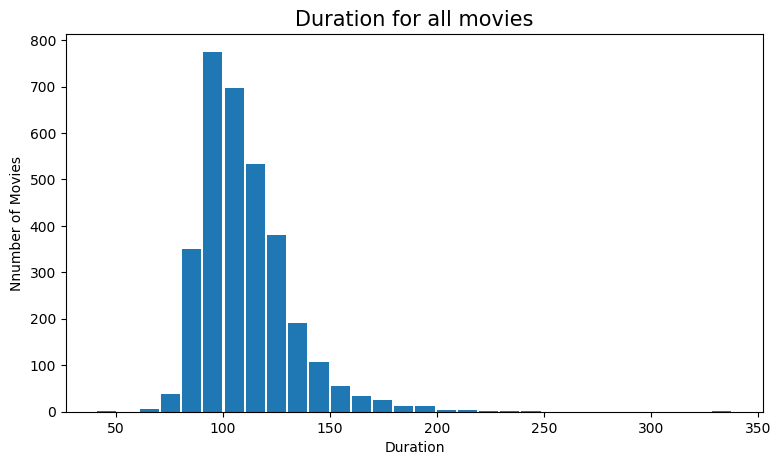

In [33]:
#plotting a histogram to show runtime of movies.

# setting the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

# setting the Name of the graph
plt.title('Duration for all movies', fontsize=15)

# setting x-axis 
plt.xlabel('Duration', fontsize = 10)
# setting y-axis 
plt.ylabel('Nnumber of Movies', fontsize=10)

# setting a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =30)
#Now Displaying the plot
plt.show()

We can easily say the the average movie duration was 100 - 110.

###  Research Question 7 - Draw List of Top 10 Popular movies

Text(0.5,1,'Popular Movies')

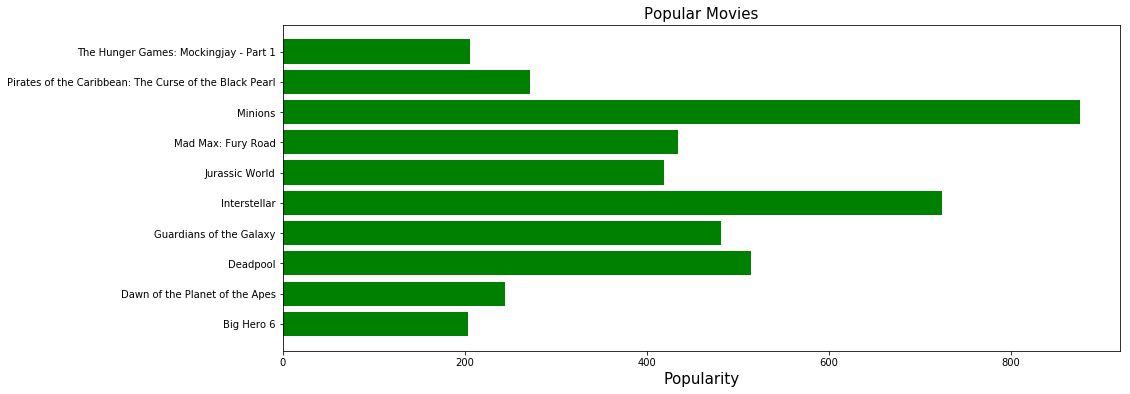

In [34]:
# Get list of top 10 popular movies by sorting in a descending order.
pop= df.sort_values('popularity', ascending=False)

plt.figure(figsize=(15,6))
plt.barh(pop['title'].head(10),
         pop['popularity'].head(10),
         color='green'
        )
plt.gca()
plt.xlabel("Popularity", fontsize = 15)
plt.title("Popular Movies", fontsize = 15)

It above calculated bar graph showed that the most popular movie was "Minions" from current historical data.

<a id='conclusions'></a>
## Conclusions

 > `Avatar` was the most profitable movie which earned 2550965087 dollar profit and it was released in 2009.
 The Lone Ranger were the worst one which loss money after it's release. It can't even earned as they spent to made this movie. The most spending were on `Pirates of the Caribbean: On Stranger Tides` which earned 665713802 dollar and it was released in 2011. People give 6 average voting to movies in the past and the longgest movie was `338` minutes long. Moreover, it is noted that the average movie dutation is between `100` and `110`minutes long. Lastly, `Minions` was the most popular movie in given historical data.


**Limitations**: This report could be improve in more effecient ways. These results are not 100% accurate. I try to do my best to genrate a genral idea by getting insights from movies historical data.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0